### A manifestation of the Runge's phenomenon

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def f(x):
  ''' The Runge's function

  :param x: independent variable
  :type x: double or numpy array of doubles
  :return: dependent variable after function evaluation
  :rtype: double or numpy array of doubles
  '''
  return 1.0/(1.0+25.0*x**2)

In [32]:
def newton_divdiff(x,node_x,node_y):
  '''Generates an interpolating polynomial using the Newton's divided differences

  :param x: the locations where the Newton's polynomials needs to be evaluated
  :type x: double or np.array
  :param node_x: the x values for the locations to be interpolated
  :type node_x: list or np.array
  :param node_y: the y values for the locations to be interpolated
  :type node_y: list or np.array
  :return: the interpolating polynomial at the provided x locations
  :rtype: list or np.array
  '''
  n = len(node_x)-1
  F = np.zeros((n+1,n+1))
  F[:,0] = node_y
  # Compute the coefficients of the Newton's polynomial
  # and store them on the main diagonal of F
  for i in range(1,n+1):
    for j in range(1,i+1):
      F[i,j] = (F[i,j-1] - F[i-1,j-1])/(node_x[i] - node_x[i-j])
  # Generate the interpolating polynomial
  poly = np.zeros(len(x))
  for i in range(n+1):
    # Compute the product of the x
    prod_x = 1.0
    for j in range(i):
      prod_x *= (x-node_x[j])
    poly += F[i,i]*prod_x
  # Return the polynomial
  return poly

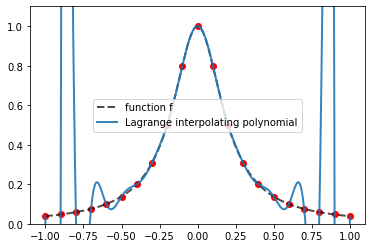

In [37]:
# 21 Equally spaced point in [-1,1]
n=21
node_x = np.linspace(-1.0,1.0,n)
node_y = f(node_x)

# Provided the x locations where to evaluate the interpolating polynomial
x = np.linspace(-1,1,1000)

# Construct the interpolant and plot it
plt.plot(node_x,node_y,'ro')
plt.plot(x,f(x),'k--',lw=2,label='function f',alpha=0.7)
plt.plot(x,newton_divdiff(x,node_x,node_y),lw=2,label='Lagrange interpolating polynomial',alpha=0.9)
plt.ylim([0,1.1])
plt.legend()
plt.show()

Lagrange interpolation on equally spaced point is an increasignly ill-conditioned process.
Reminiscent of **overfitting** and **generalization** in neural networks. 

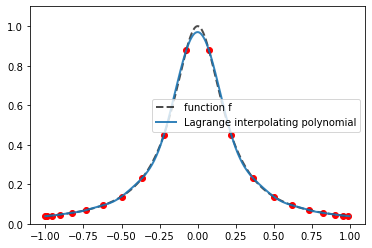

In [40]:
# Use Chebyshev nodes
n=21
k = np.arange(n)
node_x = -np.cos(k*np.pi/n)
node_y = f(node_x)

# Provided the x locations where to evaluate the interpolating polynomial
x = np.linspace(-1,1,1000)

# Construct the interpolant and plot it
plt.plot(node_x,node_y,'ro')
plt.plot(x,f(x),'k--',lw=2,label='function f',alpha=0.7)
plt.plot(x,newton_divdiff(x,node_x,node_y),lw=2,label='Lagrange interpolating polynomial',alpha=0.9)
plt.ylim([0,1.1])
plt.legend()
plt.show()